In [21]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # plotting library
import keras
import tensorflow as tf
import seaborn as sns

In [2]:
from keras.datasets import mnist

# load dataset
(X_train1, y_train1),(X_test1, y_test1) = mnist.load_data()
print(len(X_train1), len(y_train1))


60000 60000


In [3]:
print('X Training shape: ', X_train1.shape)
print('X Training shape: ', y_train1.shape)
print('X Training shape: ', X_test1.shape)
print('X Training shape: ', y_test1.shape)
#Here 60000 are noo of samples and 28x28 is hxb

X Training shape:  (60000, 28, 28)
X Training shape:  (60000,)
X Training shape:  (10000, 28, 28)
X Training shape:  (10000,)


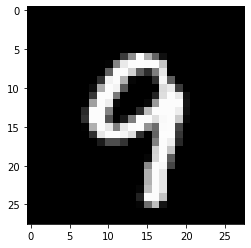

9


In [4]:
plt.imshow(X_train1[550], cmap="gray")
plt.show()
print(y_train1[550])

In [5]:
input_shape = (28,28,1)
epochs = 5

In [6]:
#Noramlize the image pixels
X_train = X_train1.astype("float32")/255
X_test =X_test1.astype("float32")/255


In [7]:
print(X_train.shape)

(60000, 28, 28)


In [8]:
#Expanding dimension with 1 at the end to create similar channel to image input
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, - 1)
print(X_train.shape)
#X_test = np.expand_dims(X_test, 0) adds 1 in the beigning 

(60000, 28, 28, 1)


In [9]:
#One Hot encoding 
y_train = keras.utils.to_categorical(y_train1,10)
y_test = keras.utils.to_categorical(y_test1,10)

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation ='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [14]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(10000, 10)


In [15]:
r = model.fit(X_train,y_train,epochs = 5,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.3592 - accuracy: 0.9007 - val_loss: 0.1959 - val_accuracy: 0.9441
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1647 - accuracy: 0.9531 - val_loss: 0.1419 - val_accuracy: 0.9595
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1183 - accuracy: 0.9662 - val_loss: 0.1102 - val_accuracy: 0.9675
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0895 - accuracy: 0.9737 - val_loss: 0.0976 - val_accuracy: 0.9703
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0718 - accuracy: 0.9794 - val_loss: 0.0877 - val_accuracy: 0.9731


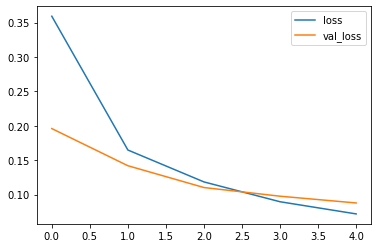

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

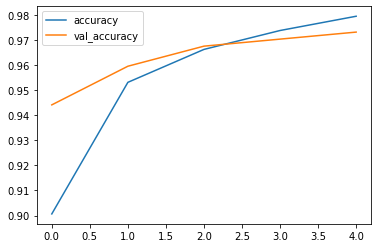

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)
confusion_matrix=tf.math.confusion_matrix(y_true,y_pred_classes)


313/313 [==============================] - 1s 2ms/step


<AxesSubplot:>

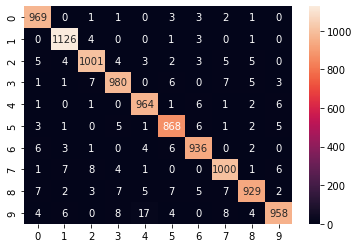

In [25]:
sns.heatmap(confusion_matrix,annot=True,fmt='g')